# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

### Parte A. Análisis Exploratorio
#### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import shap
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, GridSearchCV

Se trabajará con los datos correspondientes a los años 2017, 2018 y 2019.

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset1 = dataset[mask]

#Nos quedamos solamente con la estación Illia y la forma de pago Telepase
mask2 = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset2 = dataset[mask2]

#Quitamos las columnas que no vamos a utilizar
dataset1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True,axis=1)
dataset2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True,axis=1)
dataset1.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
dataset2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset1.drop(columns=['fecha','hora_fin'], inplace = True)

dataset1.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset1.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset1.sort_values('fecha', inplace = True)
dataset1.reset_index(drop=True, inplace = True)
dataset1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


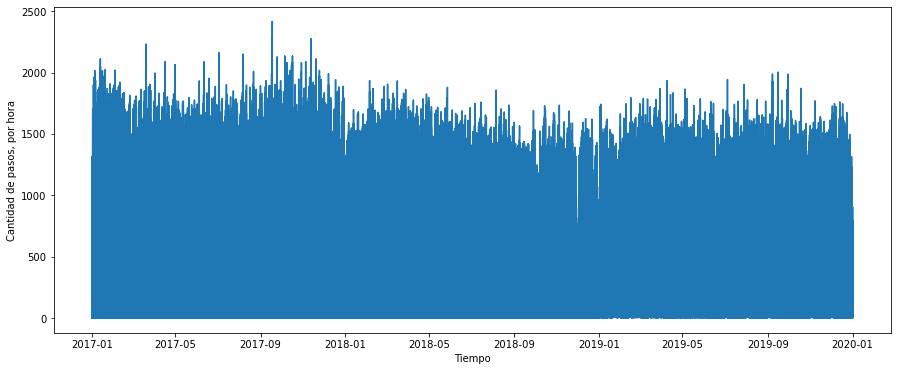

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset1.fecha, dataset1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por hora')
plt.savefig('datoscrudos.png')
plt.show()

In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset1.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


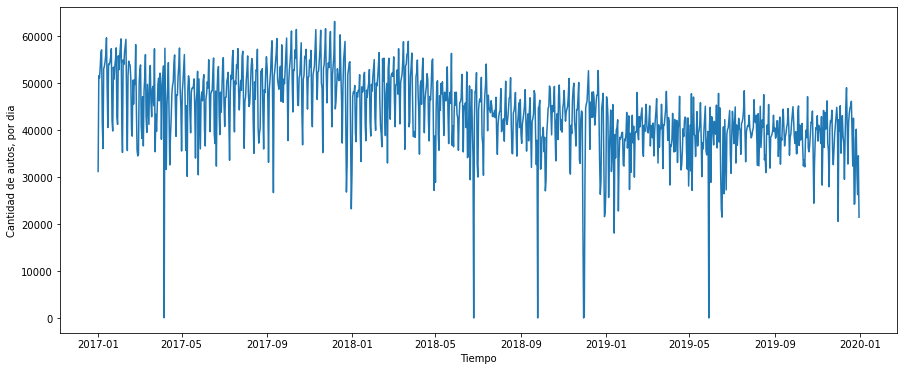

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.savefig('datosresampleadosxdia.png')
plt.show()

Podemos observar en el gráfico que hay valores de cantidad de autos cercanos a cero para algunas fechas. Situación que nos está indicando la presencia de datos faltantes o nulos.

In [18]:
# Nos fijamos si hay valores nulos en cantidad de pasos
diario.cantidad_pasos.isnull().sum()

0

In [19]:
diario = diario.reset_index()

In [20]:
#Chequeamos que las fechas sean continuas
diario['date_check'] = diario.fecha.diff()

In [21]:
diario.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

Observaciones:
- No existen valores nulos en cantidad de pasos 
- Existen 1094 diferencias de 1 día, con lo que concluimos que la serie es contínua.

In [22]:
#Imputamos los valores con datos igual a 0
diario.cantidad_pasos[diario.cantidad_pasos < 10000] = np.nan


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
diario = diario.interpolate()

In [24]:
diario.isna().sum()

fecha             0
cantidad_pasos    0
date_check        1
dtype: int64

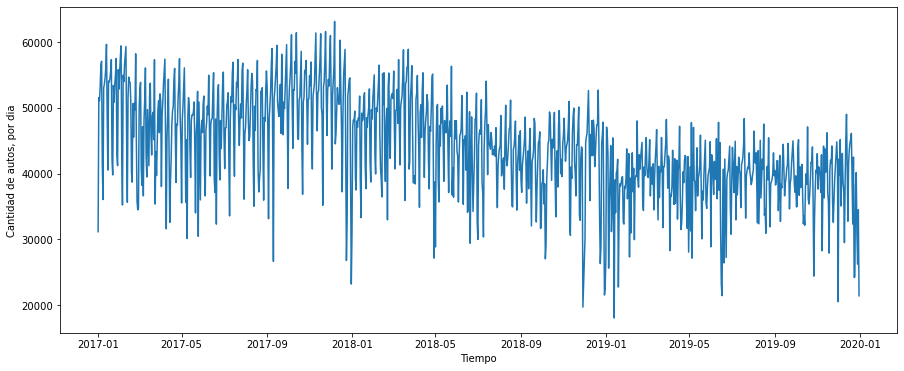

In [25]:
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.savefig('serieimputadaxdia.png')
plt.show()

#### Prueba de estacionalidad: ADF test

Se realizará una prueba estadística para ensayar si esta serie es o no estacionaria.

In [26]:
#Probamos estacionalidad
#Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller 
X = diario.cantidad_pasos 
result = adfuller(X) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): print('\t%s: %.3f' % (key, value)) 
print('p> 0.05, La serie no es estacionaria')

ADF Statistic: -1.752326
p-value: 0.404374
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p> 0.05, La serie no es estacionaria


### Autocorrelación

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

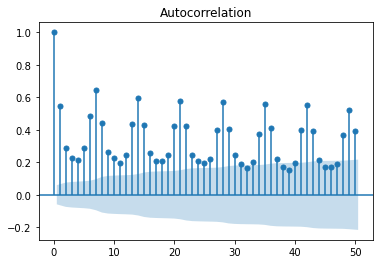

In [28]:
#Graficamos la autocorrelación de esta serie
plot_acf(diario.cantidad_pasos, lags=50) #50 días
plt.savefig('autocorrelacion.png')
plt.show()

Observamos que la serie tiende a repetirse a si misma en un ciclo de 7 días.

## Media movil

In [29]:
ventana = 7
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

0                NaN
1                NaN
2                NaN
3       48904.285714
4       49601.714286
            ...     
1090    31197.428571
1091    30801.285714
1092             NaN
1093             NaN
1094             NaN
Name: cantidad_pasos, Length: 1095, dtype: float64

In [30]:
diario_promedio_tendencia = pd.DataFrame(diario_promedio_tendencia).set_index(diario.fecha)
diario_promedio_tendencia

,cantidad_pasos
fecha,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,48904.285714
2017-01-05,49601.714286
...,...
2019-12-27,31197.428571
2019-12-28,30801.285714
2019-12-29,NaN


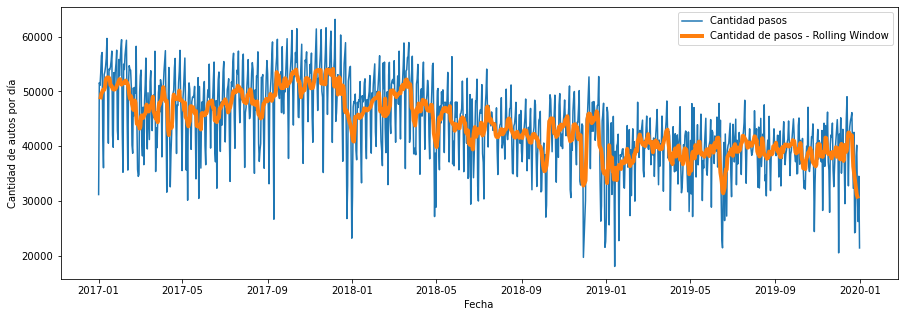

In [31]:
plt.figure(figsize = (15,5))
plt.plot(diario.fecha, diario.cantidad_pasos, label = 'Cantidad pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos por día')
plt.savefig('serieconrollingw.png')
plt.legend()
plt.show()

In [32]:
diario.set_index('fecha', inplace=True)

In [33]:
diario.head()

,cantidad_pasos,date_check
fecha,,
2017-01-01,31183.0,NaT
2017-01-02,51568.0,1 days
2017-01-03,51093.0,1 days
2017-01-04,53332.0,1 days
2017-01-05,56486.0,1 days


### Descoposición de la serie

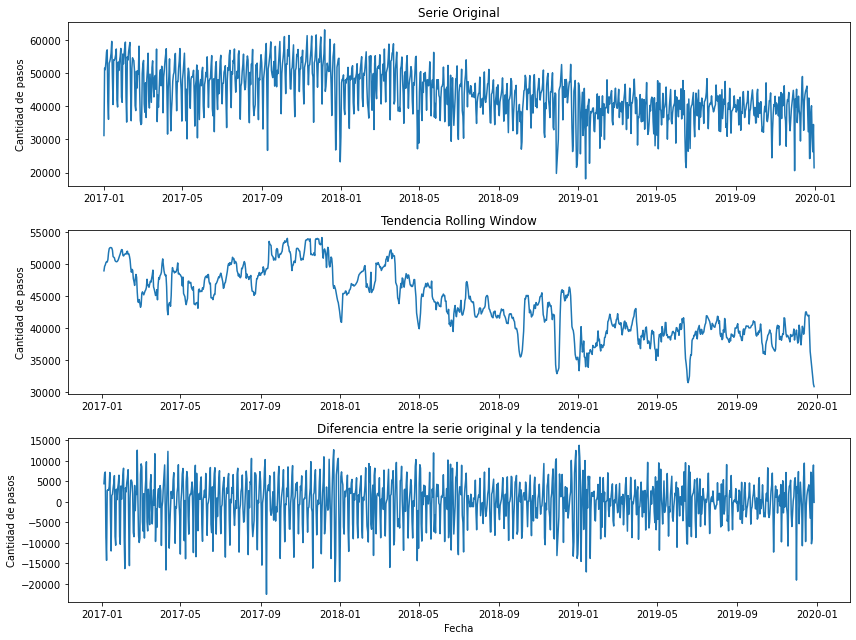

In [34]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.savefig('primeradescomposicion.png')
plt.show()

En este caso se descompone la serie en la media movil y su diferencia con la serie original. Quedando por descomponer la componente correspondiente al ciclo estacional.

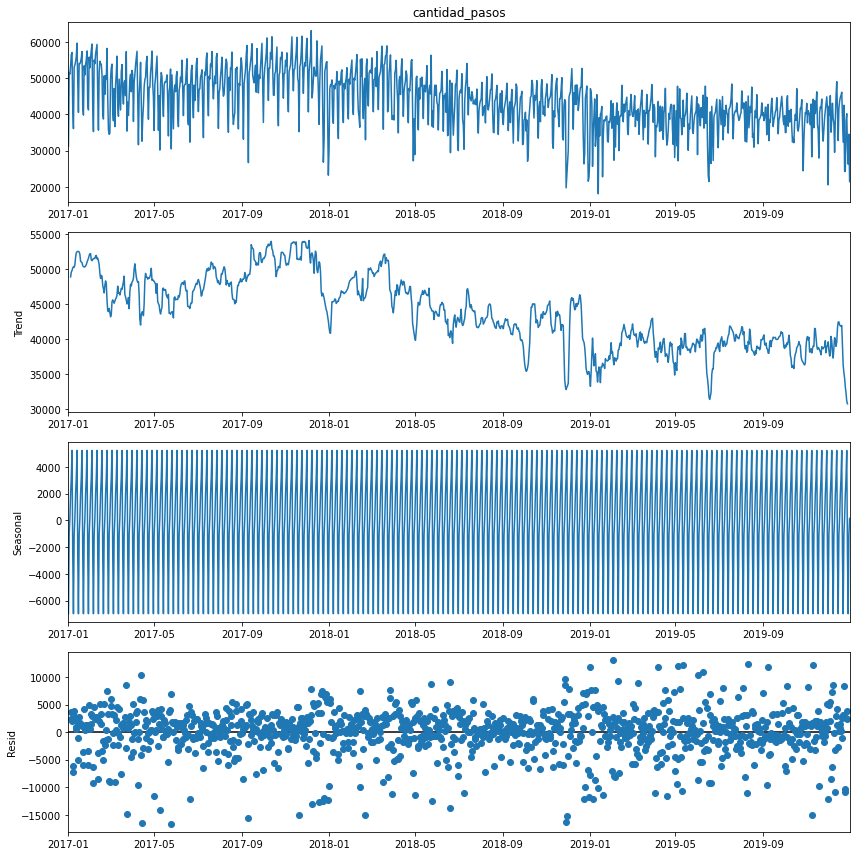

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(diario.cantidad_pasos, model='aditive') 

import matplotlib 
matplotlib.rcParams['figure.figsize'] = [12,12] 

result.plot() 
plt.savefig('statsmodeldescomp.png')
plt.show() 

Utilizando la libreria statsmodel logramos descomponer la serie y obtener la componente cíclica y obteniendo los residuos de la serie. Los mismos aparentan ser aleatorios, aunque habría que probar la aleatoriedad estadísticamente.

### Otras formas de pago: 'TELEPASE'

Buscaremos explicar la tendencia negativa de la serie. Puede ser que se trate de una migración de la forma de pago.

In [36]:
mask2 = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset2 = dataset[mask2]

In [37]:
dataset2.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106
25,2019,2019-01-01,0,1,Martes,Illia,Provincia,Pesado,TELEPASE,2
85,2019,2019-01-01,1,2,Martes,Illia,Centro,Liviano,TELEPASE,507


In [38]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)

dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
20,2019,0,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00
21,2019,0,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00
23,2019,0,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00
25,2019,0,Martes,Illia,Provincia,Pesado,TELEPASE,2,2019-01-01 01:00:00
85,2019,1,Martes,Illia,Centro,Liviano,TELEPASE,507,2019-01-01 02:00:00


In [39]:
#Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
20,2019,0,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00
21,2019,0,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00
23,2019,0,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00
25,2019,0,Martes,Illia,Provincia,Pesado,TELEPASE,2,2019-01-01 01:00:00
85,2019,1,Martes,Illia,Centro,Liviano,TELEPASE,507,2019-01-01 02:00:00


In [40]:
#Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2017,23,Domingo,Illia,Centro,Pesado,TELEPASE,9,2017-01-01 00:00:00
1,2017,23,Domingo,Illia,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
2,2017,23,Domingo,Illia,Provincia,Pesado,TELEPASE,7,2017-01-01 00:00:00
3,2017,23,Domingo,Illia,Provincia,Liviano,TELEPASE,275,2017-01-01 00:00:00
4,2017,23,Domingo,Illia,Centro,Liviano,TELEPASE,459,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
204607,2019,21,Martes,Illia,Provincia,Liviano,TELEPASE,600,2019-12-31 22:00:00
204608,2019,21,Martes,Illia,Centro,Liviano,TELEPASE,630,2019-12-31 22:00:00
204609,2019,22,Martes,Illia,Provincia,Liviano,TELEPASE,110,2019-12-31 23:00:00
204610,2019,22,Martes,Illia,Centro,Liviano,TELEPASE,122,2019-12-31 23:00:00


In [41]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 3)


,periodo,hora_inicio,cantidad_pasos
fecha,,,
2017-01-01,284397,1801,12326
2017-01-02,480046,2738,35621
2017-01-03,453825,2582,39390
2017-01-04,449791,2511,40294
2017-01-05,490131,2811,41373


In [42]:
diario.head()

,cantidad_pasos,date_check
fecha,,
2017-01-01,31183.0,NaT
2017-01-02,51568.0,1 days
2017-01-03,51093.0,1 days
2017-01-04,53332.0,1 days
2017-01-05,56486.0,1 days


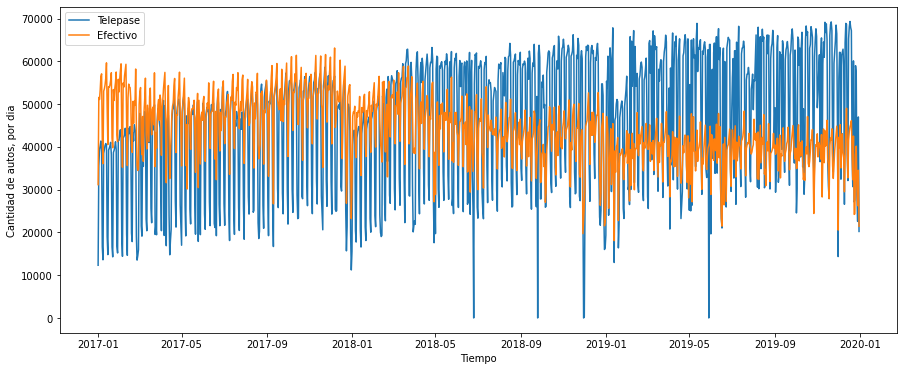

In [43]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend(('Telepase', 'Efectivo'))
#plt.savefig('datosresampleadosxdia.png')
plt.show()

Como podemos observar en el anterior gráfico, la tendencia negativa de la serie de la forma de pago 'EFECTIVO' en la estación 'Ilia' puede explicarse por una migración a la forma de pago 'TELEPASE'.

## Parte 2. Predicción a futuro:

In [44]:
look_back = 90 # 90 días

In [45]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [46]:
diario.head()

,cantidad_pasos,date_check
fecha,,
2017-01-01,31183.0,NaT
2017-01-02,51568.0,1 days
2017-01-03,51093.0,1 days
2017-01-04,53332.0,1 days
2017-01-05,56486.0,1 days


In [47]:
xdia = diario.cantidad_pasos
xdia

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    21447.0
Name: cantidad_pasos, Length: 1095, dtype: float64

In [48]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = xdia.iloc[i:i+look_back]
    y[i] = xdia.iloc[i+look_back]

In [49]:
N_train = 365*2 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 365*1 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(364, 90) (364,)


In [50]:
#Escalamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo benchmark

Como modelo benchmark se toma para predecir el valor copiado de la fecha anterior.

In [51]:
y_test_pred_benchmark = y[-1 + N_train : N_train + N_test - 1]

In [52]:
y_test_pred_benchmark.shape

(365,)

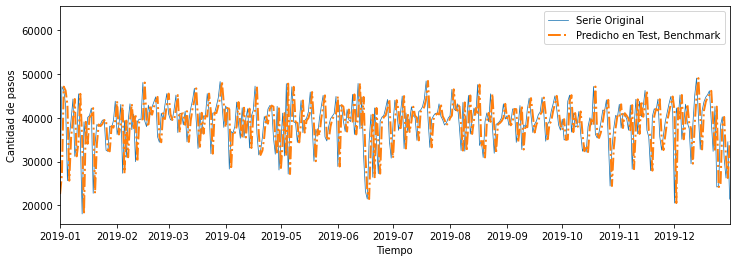

In [53]:
plt.figure(figsize=(12,4))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(xdia.index[N_train+look_back], xdia.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('benchmark.png')
plt.legend()
plt.show()

In [54]:
#y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y_test_pred_benchmark[:-1])
round(np.sqrt(MSE), 2)

6633.91

### One-step prediction

Para realizar las predicciones se utilizarán dos modelos: Random Forest y XGBoost. En ambos casos, se entrenarán con y sin optimizar sus hiperparámetros.

### Random Forest Regressor sin optimizar

In [55]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train_scaled,y_train)

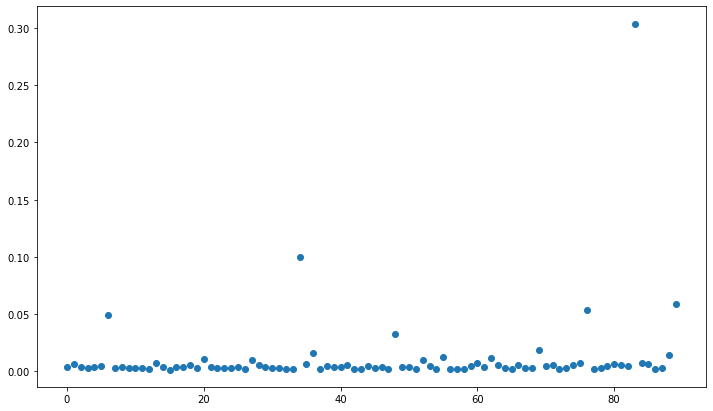

In [56]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

El modelo toma para predecir información obtenida de 7 días atras.

In [57]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

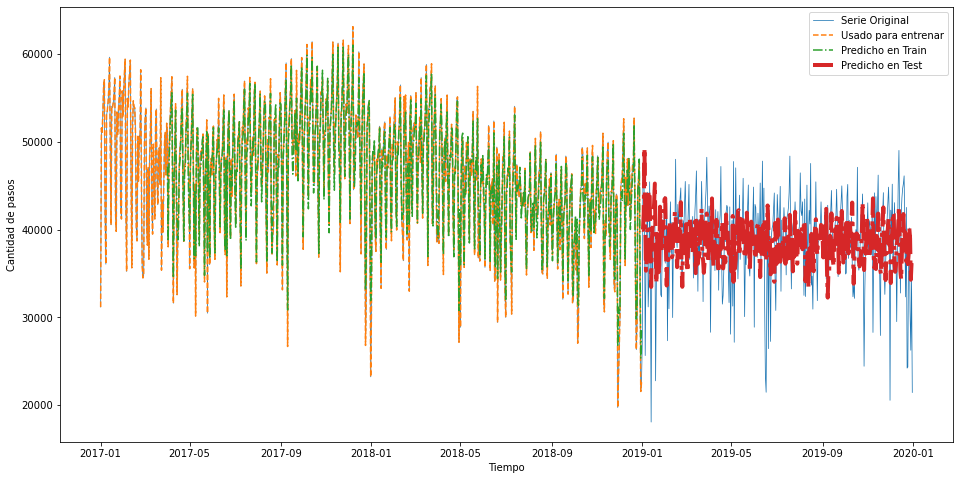

In [58]:
plt.figure(figsize=(16,8))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[:N_train + look_back], xdia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(xdia.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(xdia.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('RFsinoptimizar.png')
plt.show()

In [59]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',round(np.sqrt(MSE),2))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',round(np.sqrt(MSE),2))

Error en Train: 1775.04
Error en Test: 5175.23


### Multistep prediction

In [60]:
y_ms_test_pred = []
x = X_test_scaled[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

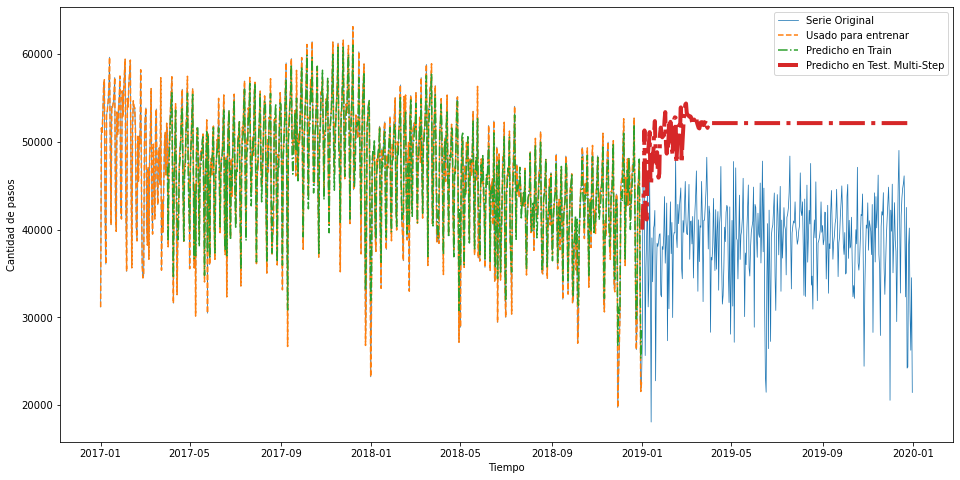

In [61]:
plt.figure(figsize=(16,8))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[:N_train + look_back], xdia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(xdia.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(xdia.index[N_train+look_back: length_total-1], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('multistepRFsinopt.png')
plt.show()

In [62]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',round(np.sqrt(MSE), 2))

Error en Test: 13841.25


Multi-step predicition no sería una metodología oportuna en este caso.

### Optimización de hiperparámetros

In [63]:
param_grid = {
    "n_estimators" : [47, 48, 48.5, 49, 50],
    "max_depth" : [50, 100, 120, 140, 160, 180, 200, 500, 1000],
    "max_features" : ["auto","sqrt", "log2"],
    "bootstrap" : [True, False],
            }

In [64]:
tscv = TimeSeriesSplit(n_splits=3)

In [65]:
RF = RandomForestRegressor(random_state = 42)
RF_reg = RandomizedSearchCV(RF, param_grid, n_jobs=-1, cv=tscv, scoring='neg_mean_squared_error', random_state=42, n_iter=40, verbose=1, return_train_score=True)

In [66]:
RF_reg.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   20.7s finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
                   estimator=RandomForestRegressor(random_state=42), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 120, 140, 160,
                                                      180, 200, 500, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [47, 48, 48.5, 49, 50]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=1)

In [67]:
RF_reg.best_params_

{'n_estimators': 48,
 'max_features': 'auto',
 'max_depth': 140,
 'bootstrap': True}

In [68]:
param_gs = {
    "n_estimators" : [47, 47.5, 48, 48.5],
    "max_depth" : [1, 2, 3, 5, 10],
    "max_features" : ["auto","sqrt", "log2"],
    "bootstrap" : [True, False],
            }

In [69]:
RF_gscv = GridSearchCV(RF, param_gs,n_jobs=-1, cv=tscv, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

In [70]:
RF_gscv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   17.4s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [47, 47.5, 48, 48.5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [71]:
RF_gscv.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 48}

In [72]:
y_pred_rf = RF_gscv.predict(X)
y_train_pred_rf = RF_gscv.predict(X_train_scaled)
y_test_pred_rf = RF_gscv.predict(X_test_scaled)

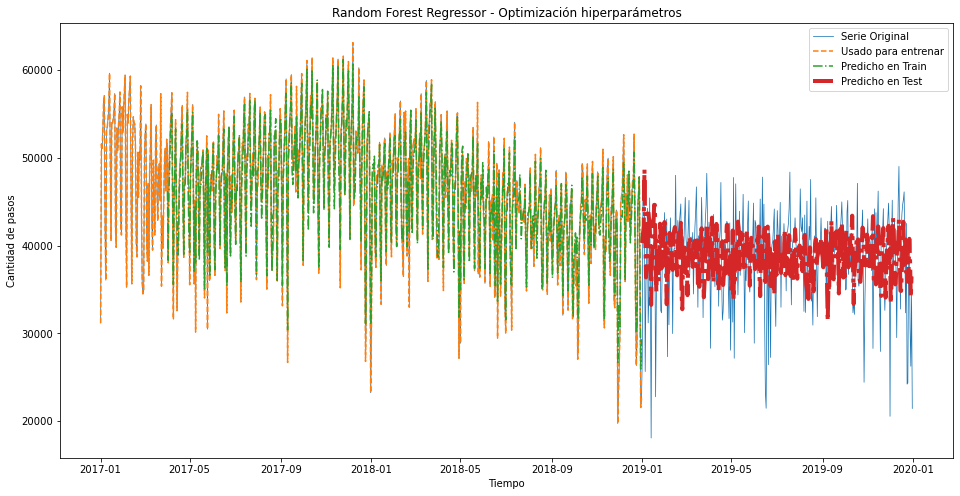

In [73]:
plt.figure(figsize=(16,8))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[:N_train + look_back], xdia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(xdia.index[look_back: look_back + N_train], y_train_pred_rf,'-.',label = 'Predicho en Train')
plt.plot(xdia.index[N_train+look_back: length_total-1], y_test_pred_rf,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('Random Forest Regressor - Optimización hiperparámetros')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('RFoptimizado.png')
plt.show()

In [74]:
MSE = mean_squared_error(y_train, y_train_pred_rf)
print('Error en Train:',round(np.sqrt(MSE), 2))

MSE = mean_squared_error(y_test, y_test_pred_rf)
print('Error en Test:',round(np.sqrt(MSE),2 ))

Error en Train: 1933.55
Error en Test: 5225.82


In [75]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,30)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    rf_regressor = RandomForestRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    rf_regressor.fit(X_train_scaled,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = rf_regressor.predict(X_train_scaled)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = rf_regressor.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

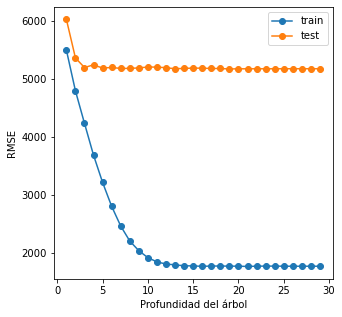

In [76]:
plt.figure(figsize = (5,5))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.savefig('RMSE_randomforest.png')
plt.show()

Observamos que el modelo podría estar overfitiado.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


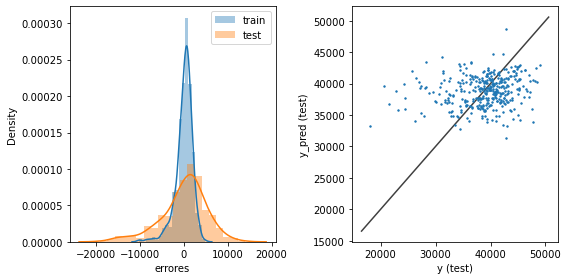

In [77]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_rf, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_rf, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rf, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.savefig('ErroresRandomForestopt.png')
plt.show()

En estos gráficos observamos que los errores tienen una distribución normal con asimetría izquierda; y que el modelo no puede predecir bien valores bajos de y, sobreestimando los valores. Además observamos que presenta una alta varianza.

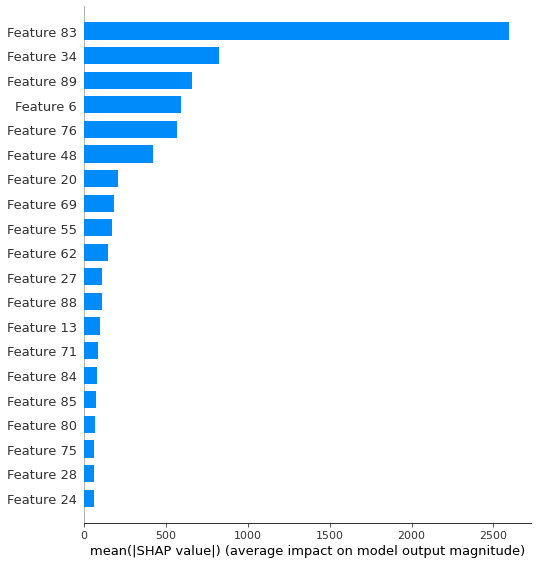

In [78]:
#SHAP feature importance
model = RF_gscv.best_estimator_
shap_values = shap.TreeExplainer(model).shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")

La librería SHAP indica lo mismo que el feature importance de Random Forest, el modelo está tomando información de ciclos de 7 días en el pasado para predecir.

### **XGBoost**

In [79]:
model = xgb.XGBRegressor()

In [80]:
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
y_pred_xgb = model.predict(X)
y_train_pred_xgb = model.predict(X_train_scaled)
y_test_pred_xgb = model.predict(X_test_scaled)

In [82]:
MSE = mean_squared_error(y_train, y_train_pred_xgb)
print('Error en Train:',round(np.sqrt(MSE), 2))

MSE = mean_squared_error(y_test, y_test_pred_xgb)
print('Error en Test:',round(np.sqrt(MSE),2))

Error en Train: 7.65
Error en Test: 6677.62


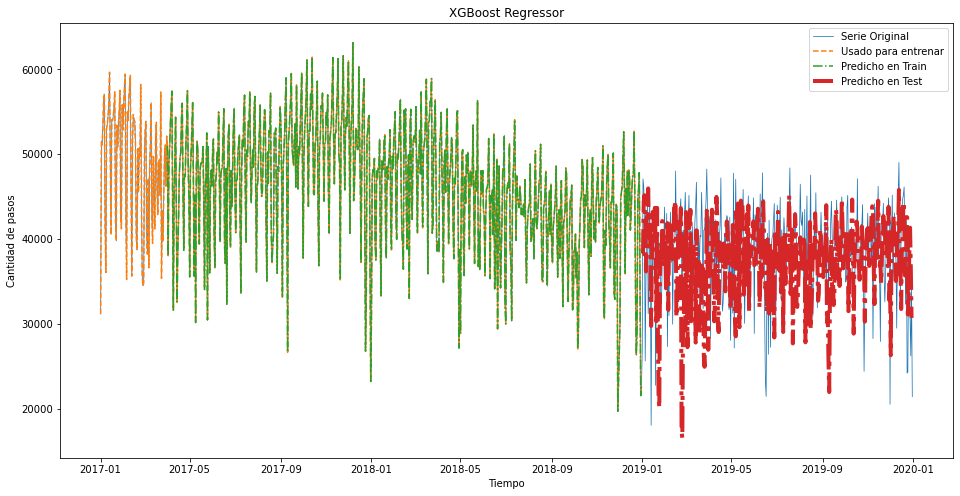

In [83]:
plt.figure(figsize=(16,8))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[:N_train + look_back], xdia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(xdia.index[look_back: look_back + N_train], y_train_pred_xgb,'-.',label = 'Predicho en Train')
plt.plot(xdia.index[N_train+look_back: length_total-1], y_test_pred_xgb,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('XGBoost Regressor')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('XGBoostsinopt.png')
plt.show()

In [84]:
params_search = {
    "max_depth": [8],
    "min_child_weight" : [3],
    "tree_method": ["hist"],
    "colsample_bytree": [0.87],
    "learning_rate" : [0.01, 0.45, 0.5],
    "gamma" : [0.0],
    "n_estimators": [133],
    "reg_lambda": [1.1,1.2],
    "subsample": [0.97],
    "reg_alpha": [1.1,1.2],
}

tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error', param_grid=params_search)
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraint...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={'colsample_bytree': [0.87], 'gamma': [0.0],
                         'learning_rate': [0.01, 0.45, 0.5], 'max_depth': [8],
               

In [85]:
gsearch.best_params_

{'colsample_bytree': 0.87,
 'gamma': 0.0,
 'learning_rate': 0.45,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 133,
 'reg_alpha': 1.1,
 'reg_lambda': 1.2,
 'subsample': 0.97,
 'tree_method': 'hist'}

In [86]:
y_pred_xgbopt = gsearch.predict(X)
y_train_pred_xgbopt = gsearch.predict(X_train_scaled)
y_test_pred_xgbopt = gsearch.predict(X_test_scaled)

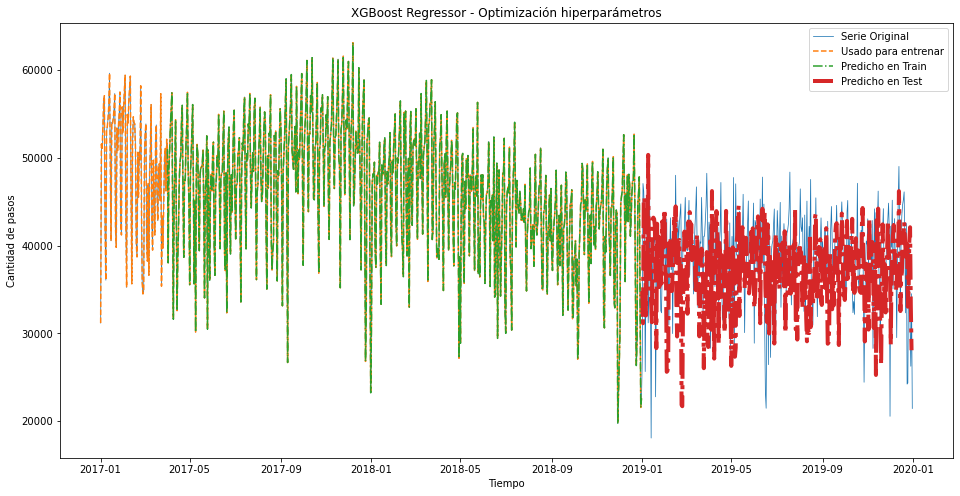

In [87]:
plt.figure(figsize=(16,8))
plt.plot(xdia.index[:length_total], xdia[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(xdia.index[:N_train + look_back], xdia[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(xdia.index[look_back: look_back + N_train], y_train_pred_xgbopt,'-.',label = 'Predicho en Train')
plt.plot(xdia.index[N_train+look_back: length_total-1], y_test_pred_xgbopt,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.title('XGBoost Regressor - Optimización hiperparámetros')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.savefig('xgboostopt.png')
plt.show()

In [88]:
MSE = mean_squared_error(y_train, y_train_pred_xgbopt)
print('Error en Train:',round(np.sqrt(MSE),2 ))

MSE = mean_squared_error(y_test, y_test_pred_xgbopt)
print('Error en Test:',round(np.sqrt(MSE),2))

Error en Train: 0.05
Error en Test: 6493.08


El modelo se encuentra fuertemente overfitiado, siendo muy poco adecuado para este caso.

In [89]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,30)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    xgb_regressor = xgb.XGBRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    xgb_regressor.fit(X_train_scaled,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = xgb_regressor.predict(X_train_scaled)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = xgb_regressor.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

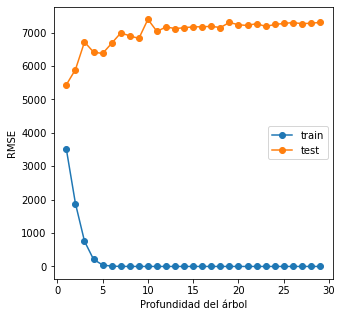

In [90]:
plt.figure(figsize = (5,5))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')
plt.savefig('RMSE_xgboost.png')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


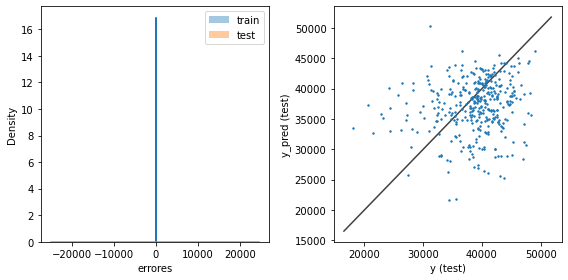

In [91]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_xgbopt, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_xgbopt, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_xgbopt, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.savefig('xgboostopt_errores.png')
plt.show()

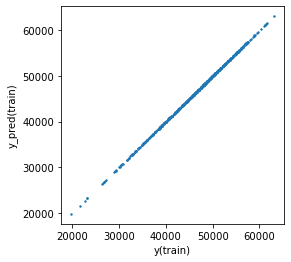

In [92]:
plt.figure(figsize = (4,4))
plt.scatter(y_train,y_train_pred_xgbopt, s =2)
plt.xlabel('y(train)')
plt.ylabel('y_pred(train)')
plt.show()

Como podemos observar XGBoost no es bajo ningún aspecto un modelo adecuado para este problema. Los errores en train son muy cercanos a cero sin seguir una distribución normal. Mientras que las predicciones no pueden tomarse como válidas a valores bajos de y ya que los sobreestima. Además, tal como se vió en el caso de Random Forest, este modelo posee una alta varianza en sus predicciones.

### XGBoost Feature importance:

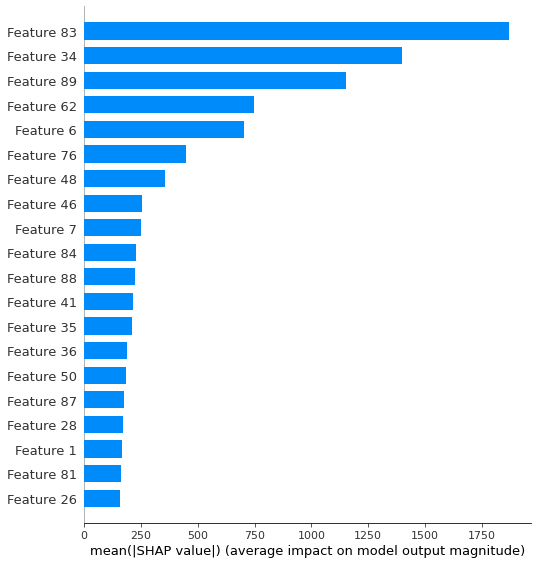

In [93]:
model = gsearch.best_estimator_
shap_values = shap.TreeExplainer(model).shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")

El modelo está utilizando un ciclo de 7 días hacia atrás para predecir.

### Predicción sobre el año 2020

In [94]:
#Importamos datos del 2020
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [95]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074574 entries, 0 to 2074573
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 205.8+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [96]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [97]:
print(data_2020['sentido'].unique())

['Centro' 'Provincia']


In [98]:
print(data_2020['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']


In [99]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']


In [100]:
data_2020b = data_2020.copy()

In [101]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020[mask]

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True,axis=1)

In [102]:
data_2020.head()

,fecha,mes,dia,dia_fecha,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
0,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Centro,24
1,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Provincia,80
2,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Paso en Infracción,Provincia,1
3,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Paso en infracción con Multa LPR,Centro,1
4,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Paso en infracción con Multa LPR,Provincia,1


In [103]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha2
0,enero,Miércoles,1,Auto,Efectivo,Centro,24,2020-01-01 01:00:00
1,enero,Miércoles,1,Auto,Efectivo,Provincia,80,2020-01-01 01:00:00
2,enero,Miércoles,1,Auto,Paso en Infracción,Provincia,1,2020-01-01 01:00:00
3,enero,Miércoles,1,Auto,Paso en infracción con Multa LPR,Centro,1,2020-01-01 01:00:00
4,enero,Miércoles,1,Auto,Paso en infracción con Multa LPR,Provincia,1,2020-01-01 01:00:00


In [104]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
0,enero,Miércoles,1,Auto,Efectivo,Centro,24,2020-01-01 01:00:00
1,enero,Miércoles,1,Auto,Efectivo,Provincia,80,2020-01-01 01:00:00
2,enero,Miércoles,1,Auto,Paso en Infracción,Provincia,1,2020-01-01 01:00:00
3,enero,Miércoles,1,Auto,Paso en infracción con Multa LPR,Centro,1,2020-01-01 01:00:00
4,enero,Miércoles,1,Auto,Paso en infracción con Multa LPR,Provincia,1,2020-01-01 01:00:00


In [105]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020.drop(['mes', 'dia_fecha', 'observacion'], axis=1, inplace=True)
data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Miércoles,Auto,Centro,29,2020-01-01
1,Miércoles,Pesados 2 Ejes,Centro,3,2020-01-01
2,Miércoles,Pesados 2 Ejes,Provincia,1,2020-01-01
3,Miércoles,Pesados 2 Ejes,Provincia,1,2020-01-01
4,Miércoles,Pesados 2 Ejes,Provincia,1,2020-01-01


In [106]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2020 = data_2020.resample('D', on = 'fecha').sum()
print(diario2020.shape)
diario2020.head()

(305, 1)


,cantidad_pasos
fecha,
2020-01-01,191034
2020-01-02,350026
2020-01-03,378523
2020-01-04,266216
2020-01-05,226755


In [107]:
diario.head()

,cantidad_pasos,date_check
fecha,,
2017-01-01,31183.0,NaT
2017-01-02,51568.0,1 days
2017-01-03,51093.0,1 days
2017-01-04,53332.0,1 days
2017-01-05,56486.0,1 days


In [108]:
diario_final = pd.concat([diario, diario2020])

In [109]:
look_back = 90 # 90 días

N = diario_final.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1309, 90) (1309,)


In [110]:
xdia2020 = diario_final.cantidad_pasos
xdia2020

fecha
2017-01-01     31183.0
2017-01-02     51568.0
2017-01-03     51093.0
2017-01-04     53332.0
2017-01-05     56486.0
                ...   
2020-10-27    311072.0
2020-10-28    308401.0
2020-10-29    307994.0
2020-10-30    341937.0
2020-10-31    218701.0
Name: cantidad_pasos, Length: 1400, dtype: float64

In [111]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = xdia2020.iloc[i:i+look_back]
    y[i] = xdia2020.iloc[i+look_back]

In [112]:
N_train2020 = 365*3 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test2020 = 305 #cantidad de puntos que vamos a usar para evaluar
N_total2020 = N_train2020 + N_test2020

length_total2020 = N_train2020 + N_test2020 + look_back

In [113]:
X_train2020 = X[:N_train2020,:]
y_train2020 = y[:N_train2020]
print(X_train2020.shape, y_train2020.shape)

X_test2020 = X[N_train2020:N_train2020+N_test2020,:]
y_test2020 = y[N_train2020:N_train2020+N_test2020]
print(X_test2020.shape, y_test2020.shape)

(1005, 90) (1005,)
(304, 90) (304,)


In [114]:
#Predecimos utilizando el modelo RandomForest
y_test_pred2020_rf = RF_gscv.predict(X_test2020)

In [115]:
MSE = mean_squared_error(y_test2020, y_test_pred2020_rf)
print('Error en Test:',round(np.sqrt(MSE),2))

Error en Test: 202796.38


Podemos observar que el modelo registra un error altísimo para la predicción del flujo de vehículos durante el 2020. Situación que era previsible dada la situación de contingencia que hemos transitado.

## Parte C. Investigación 

Los dataset utilizados contienen información sobre tipo de vehículo, forma de pago, sentido, día de la semana, entre otros. Estos datos categóricos podrían incorporarse al set de entrenamiento de los modelos utilizados utilizando algún método de encoding tales como One-hot encoding o utilizando modelos que soportan datos de este tipo, como por ejemplo Catboost. La incorporación de más features a un modelo por lo general favorece el overfitting, con lo que dados los resultados aquí obtenidos no mejorarían los modelos.

Otras estaciones de peaje:

In [116]:
print('Año 2017')
print(data_2017['estacion'].unique())

print('Año 2018')
print(data_2018['estacion'].unique())

print('Año 2019')
print(data_2019['estacion'].unique())

print('Año 2020')
print(data_2020b['estacion'].unique())

Año 2017
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Año 2018
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
Año 2019
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
Año 2020
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [117]:
alberdi = pd.concat([data_2019, data_2018, data_2017])

In [118]:
alberdi.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'EXENTO', 'INFRACCION',
       'T. DISCAPACIDAD', 'TARJETA DISCAPACIDAD', 'MONEDERO', 'Otros'],
      dtype=object)

In [ ]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask4 = np.logical_and(alberdi.estacion=='Alberdi', alberdi.forma_pago == 'EFECTIVO')
alberdi = alberdi[mask4]

#Quitamos las columnas que no vamos a utilizar
alberdi.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True,axis=1)
alberdi.head()

In [ ]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
alberdi['fecha2'] = pd.to_datetime(alberdi.fecha) + pd.to_timedelta(alberdi.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
alberdi.drop(columns=['fecha','hora_fin'], inplace = True)

alberdi.head()

In [ ]:
#Corregimos el nombre de fecha2 a fecha
alberdi.rename(columns = {'fecha2':'fecha'}, inplace = True) 
alberdi.head()

In [ ]:
#Reordenamos el dataset por fecha
alberdi.sort_values('fecha', inplace = True)
alberdi.reset_index(drop=True, inplace = True)
alberdi

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(alberdi.fecha, alberdi.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por hora')
#plt.savefig('datoscrudos.png')
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
alberdi_diario = alberdi.resample('D', on = 'fecha').sum()
print(alberdi_diario.shape)
alberdi_diario.head()

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(alberdi_diario.index, alberdi_diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
#plt.savefig('datosresampleadosxdia.png')
plt.show()

La serie correspondiente a la estacion Alberdi, parece seguir una tendencia a mantenerse igual en el tiempo. Este comportamiento es distinto al que se observó para la estación Illia. Habría que evaluar porque en esta estación no se registra una disminución en la forma de pago "efectivo". Quizas se deba a que en este peaje no se utiliza el telepase tanto como las otras.

Finalmente, luego de observar que los modelos utilizados no sirven para modelar el flujo de vehículos en la estación Illia, me gustaría encontrar un modelo que lo lograse hacer.